In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
df = pd.read_csv('../data/kc_house_data.csv')

In [21]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [22]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [23]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [24]:
df.corr().sort_values('price')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
zipcode,-0.008211,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,0.031057,0.085277,0.002888,-0.185771,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
long,0.020672,0.022036,0.132054,0.224903,0.241214,0.230227,0.125943,-0.039864,-0.077894,-0.105877,0.200341,0.344842,0.409993,-0.072156,-0.564259,-0.135371,1.000000,0.335626,0.255586
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.026079,-0.054564,-0.361592,0.447865,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
sqft_lot15,-0.138557,0.082845,0.030690,0.088303,0.184342,0.718204,-0.010722,0.032002,0.073332,-0.003126,0.120981,0.195077,0.070777,0.003852,-0.147294,-0.086139,0.255586,0.183515,1.000000
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.087244,0.100964,-0.061858,0.016669,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002


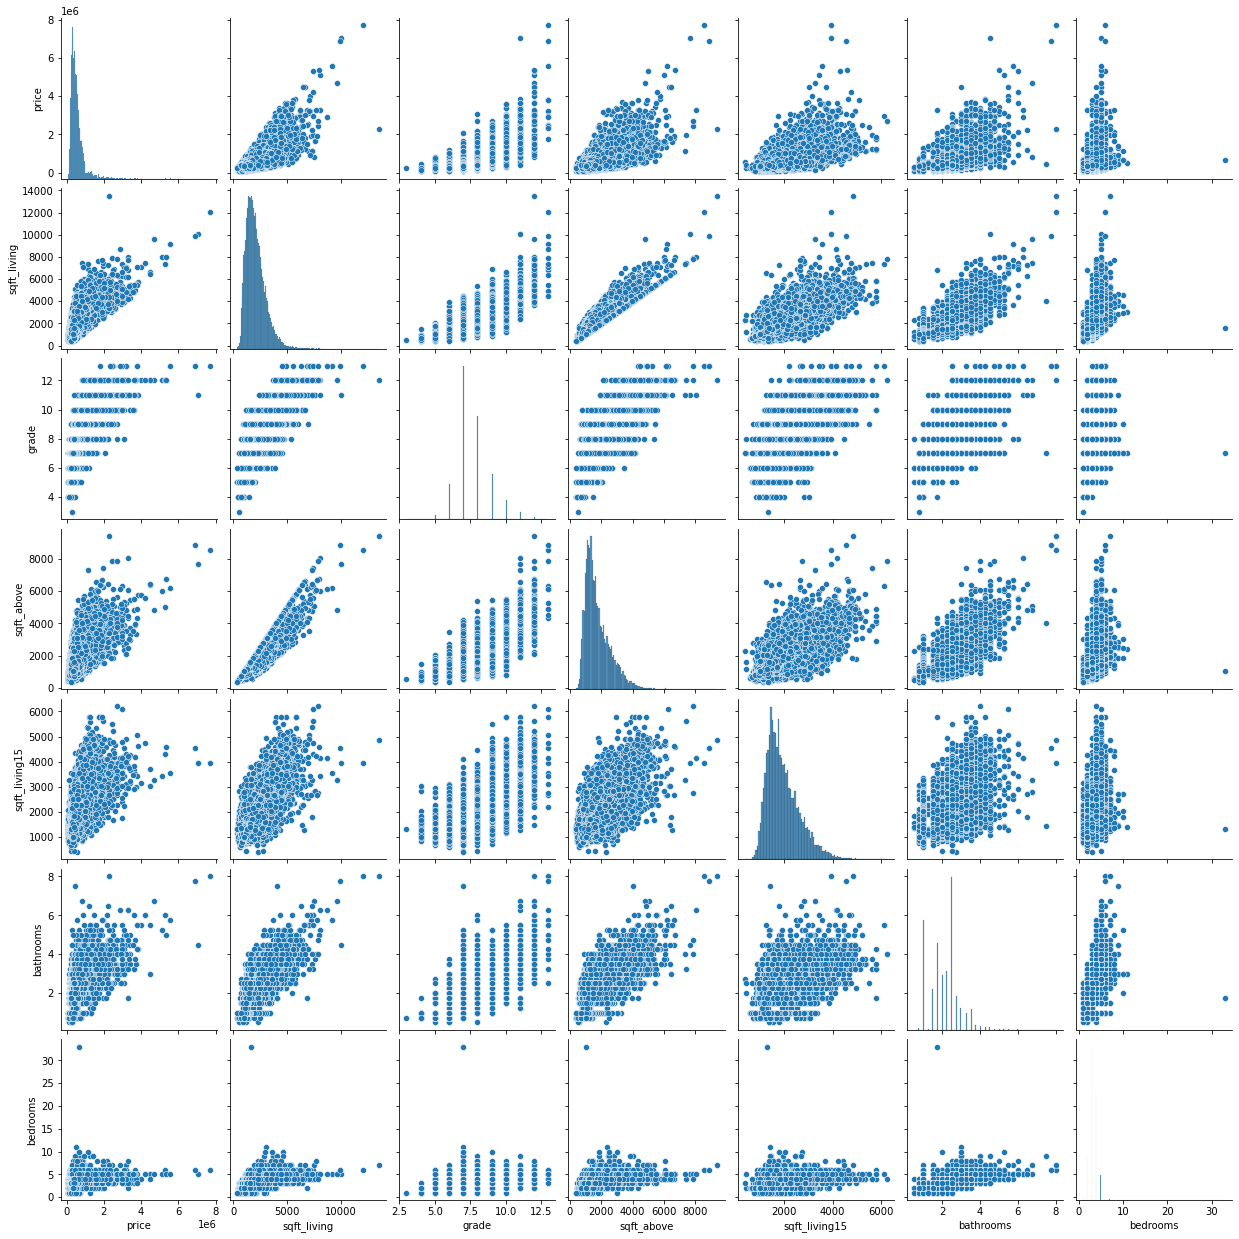

In [25]:
sns.pairplot(
    df,
    x_vars=["price", "sqft_living", "grade", 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms'],
    y_vars=["price", "sqft_living", "grade", 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms'],
);

<AxesSubplot:ylabel='Frequency'>

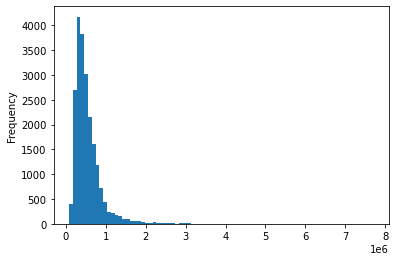

In [27]:
df['price'].plot(kind='hist', bins=80)

In [28]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [29]:
df['log_price'] = np.log(df['price'])

<AxesSubplot:ylabel='Frequency'>

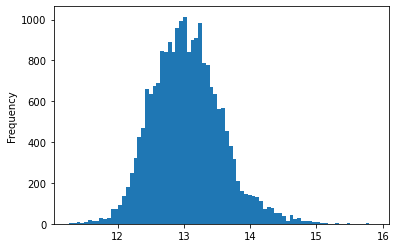

In [30]:
df['log_price'].plot(kind='hist', bins=80)

In [31]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [32]:
df['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [33]:
df = df[df.bedrooms != 33]

In [34]:
df.shape

(21596, 22)

In [35]:
df['bathrooms'].describe()

count    21596.000000
mean         2.115843
std          0.768998
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

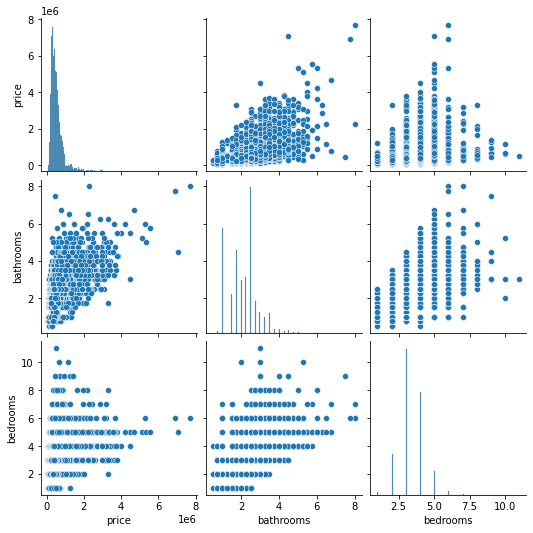

In [36]:
sns.pairplot(
    df,
    x_vars=["price", 'bathrooms', 'bedrooms'],
    y_vars=["price", 'bathrooms', 'bedrooms'],
);

In [39]:
df.groupby(['bedrooms']).price.mean()

bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
Name: price, dtype: float64

In [43]:
df.loc[df['bedrooms'] > 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
4092,1997200215,5/7/2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291,13.304683
4231,2902200015,1/6/2015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450,13.458836
6073,9822700190,8/8/2014,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,2530,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000,14.062371
8537,424049043,8/11/2014,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866,13.017003
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,13.161584
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,13.955273
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,13.384728
16830,8823900290,3/17/2015,1400000.0,9,4.00,4620,5508,2.5,0.0,0.0,...,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320,14.151983
18428,8823901445,3/13/2015,934000.0,9,3.00,2820,4480,2.0,0.0,0.0,...,1880,940.0,1918,0.0,98105,47.6654,-122.307,2460,4400,13.747232
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,13.399995
